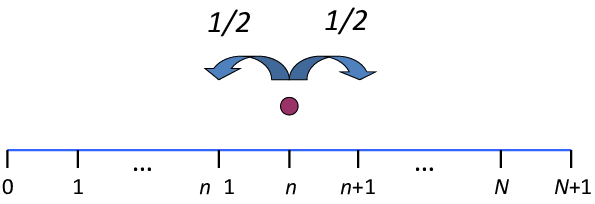

# Random Walk


As a physics student sometimes you see some random movement in nature like brownian motion(it's actually deterministic). we can use stochastic litrature to study brownian motion and find lots of valuable information about this process. Random walk is somehow one of the most instructive models that can help you understand how random process can model the nature.

for the beging let's see what random walk is. according to Wikipedia(https://en.wikipedia.org/wiki/Random_walk) random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

An elementary example of a random walk is the random walk on the integer number line, ${\displaystyle \mathbb {Z} }$ , which starts at 0 and at each step moves +1 or −1 with equal probability. Other examples include the path traced by a molecule as it travels in a liquid or a gas (see Brownian motion), the search path of a foraging animal, the price of a fluctuating stock and the financial status of a gambler: all can be approximated by random walk models, even though they may not be truly random in reality.

We know that you are passionate and want to explore all details of these process(joke :) ) but for the begining let's start with the simplest model, one dimensional random walk with same probability for right and left step.

1. the simplest model of random walk is a One-dimensional random walk, which starts at 0 and at each step moves +1 or −1 with equal probability. consider 10000_step 1d random walk. and use $10^5$ ensemble. in each ensemble begin from the origin(0) and record the endpoint at 10000th step. plot the PDF of these endpoints. also, calculate the first four moments of this PDF.

First moment(mean) is: -0.32318
Second moment(variance) is: 9929.4184746876
Third moment(skewness) is: -10747.85073741529
Fourth moment(kurtosis) is: 297044827.4731586


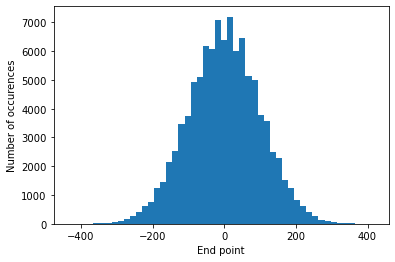

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

# One dimensional random walk process
def rand_walk(steps, ensembles):
    endpoints = []
    for e in range(ensembles):
        step_list = (np.random.randint(0, 2, steps) * 2) - 1
        endpoints.append(np.sum(step_list))
    return endpoints

endp = rand_walk(10000,100000)
plt.hist(endp, bins=50)
plt.xlabel('End point')
plt.ylabel('Number of occurences')


# Calculating the first 4 moments
mean = np.mean(endp)
var = stats.moment(endp, moment=2)
skew = stats.moment(endp, moment=3)
kurt = stats.moment(endp, moment=4)

print('First moment(mean) is:', mean)
print('Second moment(variance) is:', var)
print('Third moment(skewness) is:', skew)
print('Fourth moment(kurtosis) is:', kurt)


now look at the plot you create. does it looklike a normal distribution? if yes isn't it strange cause we know that the probability is bionomial not guassian.


It is a normal distribution! Gaussianity is not strange because we expect this result from the Central Limit Theorem.
We are taking one element subsets of a binomial distribution, and the mean of a one element subset is itself!
So we should expect the resulting distribution to be normal.

2.change the probability of jumping to right and left in a way that $P_{left} = 2 P_{right}$ and then repeat the process of Q1 again and evaluate the PDF and first four moments and cumulants. 

First moment(mean) is: -3333.18596
Second moment(variance) is: 8834.827578878401
Third moment(skewness) is: 1626.4708004046363
Fourth moment(kurtosis) is: 234619216.0364834


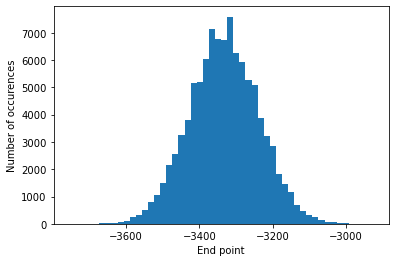

In [48]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

# One dimensional random walk process with unequal probability
def rand_walk_unequal(steps, ensembles):
    endpoints = []
    for e in range(ensembles):
        step_list = np.random.choice([1, -1], size=steps, p=[1/3, 2/3])
        endpoints.append(np.sum(step_list))
    return endpoints

endp = rand_walk_unequal(10000,100000)
plt.hist(endp, bins=50)
plt.xlabel('End point')
plt.ylabel('Number of occurences')


# Calculating the first 4 moments
mean = np.mean(endp)
var = stats.moment(endp, moment=2)
skew = stats.moment(endp, moment=3)
kurt = stats.moment(endp, moment=4)

print('First moment(mean) is:', mean)
print('Second moment(variance) is:', var)
print('Third moment(skewness) is:', skew)
print('Fourth moment(kurtosis) is:', kurt)

according to your result, can you tell how the shape of PDF function related to its cumulants?

In [ ]:
#explain here

# Conditional Probability


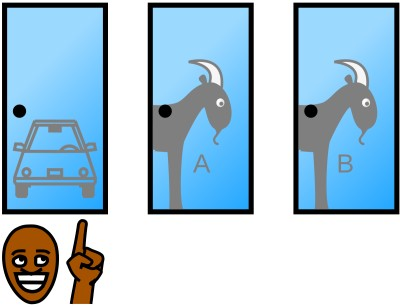

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? if Yes write a it's code to tell Us why and if your answer is No code it to prove the first group they are wrong:)

In [92]:
import numpy as np

def monty_hall(ensembles):
    # List of the doors with cars, in each ensemble
    cars = np.random.randint(1, 4, size = ensembles)
    
    # List of contestant's first choice in each ensemble
    first_choice = np.random.randint(1, 4, size = ensembles)
    
    # If the contestant doesn't change his or her mind
    temp = cars - first_choice
    win1 = temp.tolist().count(0) # Number of wins when you don't change your door
    
    # If you change the door you chose
    goats = [] # List of doors the host opens in each ensemble
    second_choice = [] # List of contestant's second choice in each ensemble
    for e in range(ensembles):
        possible_goats = [1, 2, 3]
        possible_goats.remove(first_choice[e]) # Host won't open the contestant's first choice
        if possible_goats.count(cars[e])>0:
            possible_goats.remove(cars[e]) # The host won't open the car door
        g = np.random.choice(possible_goats) # Host opens a random goat door
        goats.append(g)
        
        # Your second choice should be different than your first choice and the door host opened
        changed_door = [1, 2, 3]
        changed_door.remove(first_choice[e])
        changed_door.remove(goats[e])
        second_choice.append(changed_door[0])
    
    temp = cars - np.array(second_choice)
    win2 = temp.tolist().count(0) # Number of wins when you change the door
    
    print("Probability of winning when you don't change the door is:", win1/ensembles)
    print("Probability of winning when you change the door is:", win2/ensembles)
    return
monty_hall(100000)

print("So if you change your door, you double your chance of winning!")

Probability of winning when you don't change the door is: 0.33531
Probability of winning when you change the door is: 0.66469
So if you change your door, you double your chance of winning!


# Centeral limit theorem

Choose a non-Gaussian distribution (uniform/bionomial/poission) and generate $10^5$ random variables for each of them.                                                      
a) plot the PDF of samples you created .                                                   
b) create $10^4$ random subset of length {2 , 5 , 10 , 20 , 100} from the first non-Gaussian distribution and caclculate mean of each subset, then plot the PDF of these means.                                                                       
c) what do you understand form comparing the original distribution with those five?


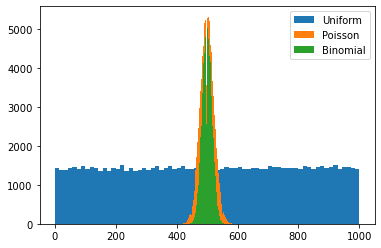

In [25]:
import numpy as np
from matplotlib import pyplot as plt

# Creating and plotting the distributions
uniform_dist = np.random.uniform(0, 1000, size=100000)
binomial_dist = np.random.binomial(1000, 0.5, size=100000)
poisson_dist = np.random.poisson(500, size=100000)

plt.hist(uniform_dist, bins=70, label='Uniform')
plt.hist(poisson_dist, bins=70, label="Poisson")
plt.hist(binomial_dist, bins=70, label='Binomial')
plt.legend()
plt.show()

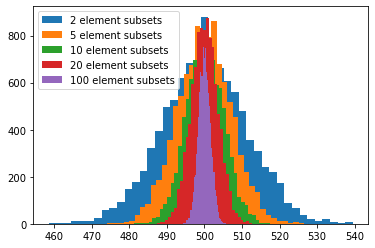

In [28]:
# Choosing random subsets

for i in (2, 5, 10, 20, 100):
    mean_list = np.array([np.mean(np.random.choice(binomial_dist, size = i)) for a in range(10**4)])
    fig = plt.hist(mean_list, bins=40, label=str(i)+ " element subsets")
    plt.legend()


As the size of the subsets increase, the normal distribution becomes sharper!

# Poission Approximation

Use python libraries to generate bionomial and poission distributions for different N’s (remember $\lambda =NP$). Over plot them for N = {5, 10, 20, 50, 100, 200, 1000}
How does it behave as N increases? 



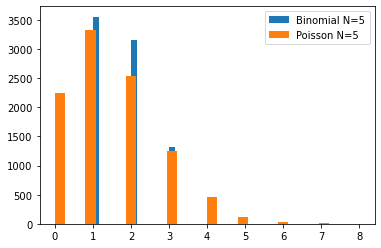

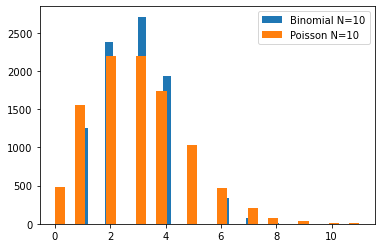

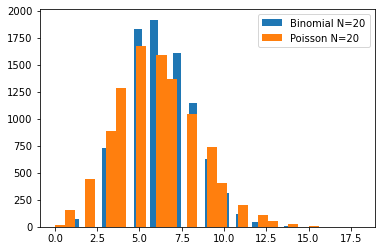

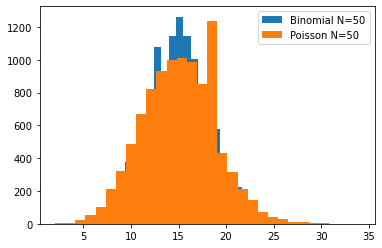

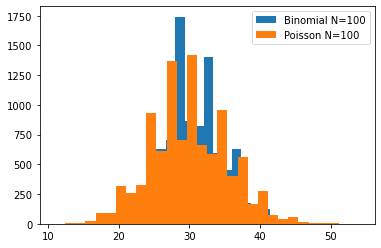

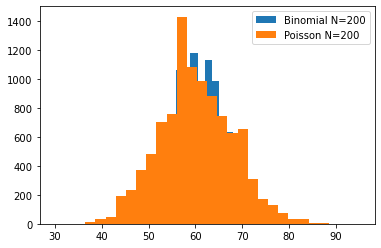

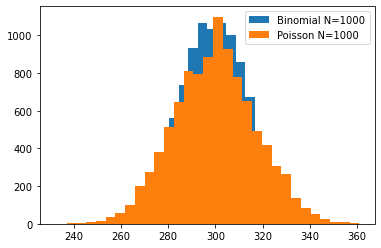

In [22]:
p = 0.3 # Probability for binomial distribution
for n in (5, 10, 20, 50, 100, 200, 1000):
    binomial = np.random.binomial(n, p, size=10000)
    poisson = np.random.poisson(n*p, size=10000)
    fig = plt.figure(n)
    plt.hist(binomial, bins=30, label='Binomial N='+str(n))
    plt.hist(poisson, bins=30, label='Poisson N='+str(n))
    plt.legend()
plt.show()

As N becomes larger, the binomial distribution reaches poisson distribution!

# Box Muller Method

1- generate Normal distribution from uniform distribution (Box-Muller algorithm(https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)- do not need to derive and prove it. the topic will be included in lectures in the following week). Normal= zero mean, unit variance    
a)Sample many points from this distribution. plot the pdf of the sample (plot hist).             
                              


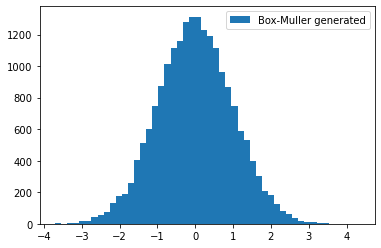

In [31]:
def box_muller(mean=0, std=1, n=10000):
    u1 = np.random.uniform(size=n)
    u2 = np.random.uniform(size=n)
    z0 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z1 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    x0 = z0*std + mean
    x1 = z1*std + mean
    return np.concatenate((x0, x1))
samples = box_muller()
plt.hist(samples, bins=50, label="Box-Muller generated")
plt.legend()
plt.show()

b)Calculate mean of the sample. Its variance.

In [9]:
mean = np.mean(samples)
var = np.var(samples)
print("Mean is:", mean)
print("Variance is:", var)

Mean is: -0.006213618584364352
Variance is: 0.9882943379874641


c)Overplot the pdf now, using this mean and variance (on the plot hist). Also use the mean and std deviation functions from python library. Do they agree?

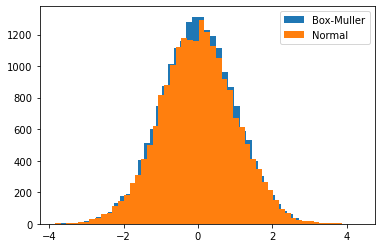

In [32]:
gaussian = np.random.normal(0, 1, 20000)
plt.hist(samples, bins=50, label="Box-Muller")
plt.hist(gaussian,bins=50, label="Normal")
plt.legend()
plt.show()

The normal generated by Box-Muller and numpy agree.

d)Now that you have your Normal distribution, how can you turn it into a Gaussian distribution with  given mean and variance? For example mean=2, and std dev=4 ?   

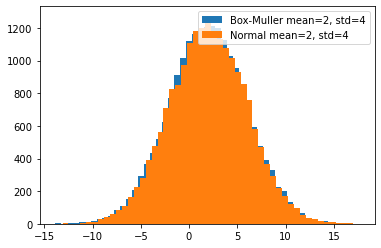

In [35]:
samples = box_muller(2, 4)
gaussian = np.random.normal(2, 4, 20000)
plt.hist(samples, bins=50, label="Box-Muller mean=2, std=4")
plt.hist(gaussian,bins=50, label="Normal mean=2, std=4")
plt.legend()
plt.show()

there are two problems left, but you can choose one of them to solve.(we highly recommend you to solve both of them)

# Nice Matrix

A matrix of size n$\times$n which include numbers of {1,2,3,...,$n^2$} is called nice, if sum of all rows and columns  are the same. write a code that get n as a input and return a n$\times$n Nice Matrix. print out the examples of Nice Matrix for n = 4,5,6

In [ ]:
#code here

# Honest and Liers

Suppose there 16 People sit around a circular table.  ٍEach claims that the two people next to him/her are liars. How many liars are there in the crowd? 

In [ ]:
#code here 